# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [1]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [3]:
# Check which files are in your Project folder
os.listdir()

['GDP Per Capita PPP.csv',
 'economic-inequality-gini-index.csv',
 'life-expectancy.csv',
 'project write up rough.gdoc',
 'cleaned_gini.csv',
 'cleaned_lfex.csv',
 'Copy of Project_Template.ipynb',
 'econ data analysis .gslides']

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
gini = pd.read_csv('economic-inequality-gini-index.csv')
lfex = pd.read_csv('life-expectancy.csv')
lfex = lfex.rename(columns={'Entity':'country', 'Year':'year', 'Period life expectancy at birth':'life_expectancy'})
gini = gini.rename(columns={'Entity':'country', 'Year':'year', 'Gini coefficient (2021 prices)':'gini'})
lfex_recent_idx = lfex.groupby('country')['year'].idxmax()
lfex_recent = lfex.loc[lfex_recent_idx].reset_index(drop=True)
gini_recent_idx = gini.groupby('country')['year'].idxmax()
gini_recent = gini.loc[gini_recent_idx].reset_index(drop=True)

#And you can save your dataset after you've worked on it.
gini_recent.to_csv('cleaned_gini.csv')
lfex_recent.to_csv('cleaned_lfex.csv')

gini_clean = pd.read_csv('cleaned_gini.csv')
lfex_clean = pd.read_csv('cleaned_lfex.csv')



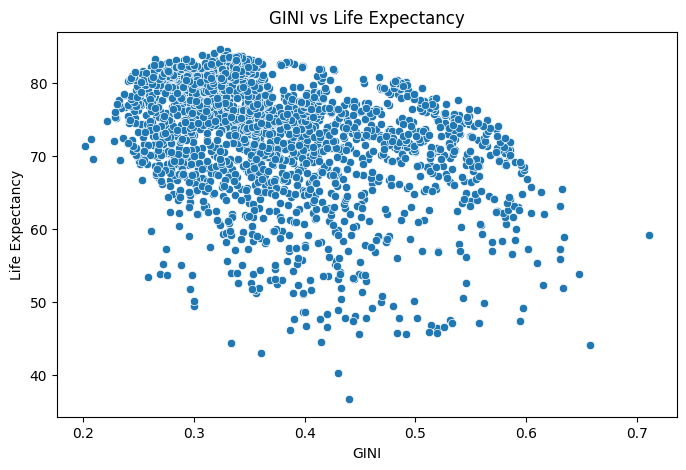

In [6]:


df = pd.merge(lfex, gini, on=['country','year'], how='inner')
df = df.dropna(subset=['life_expectancy', 'gini'])
df.head()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='gini', y='life_expectancy')
plt.title('GINI vs Life Expectancy')
plt.xlabel('GINI')
plt.ylabel('Life Expectancy')
plt.show()

In [7]:
model = smf.ols('life_expectancy ~ gini', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     358.6
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           2.63e-74
Time:                        17:28:41   Log-Likelihood:                -7617.5
No. Observations:                2240   AIC:                         1.524e+04
Df Residuals:                    2238   BIC:                         1.525e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.2567      0.673    126.652      0.0

In [ ]:
model.pvalues['gini']


np.float64(2.634337847455864e-74)

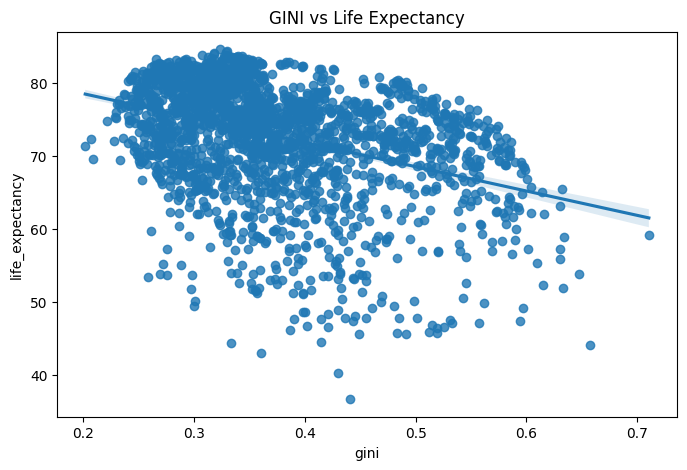

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='gini', y='life_expectancy')
plt.title('GINI vs Life Expectancy')
plt.show()

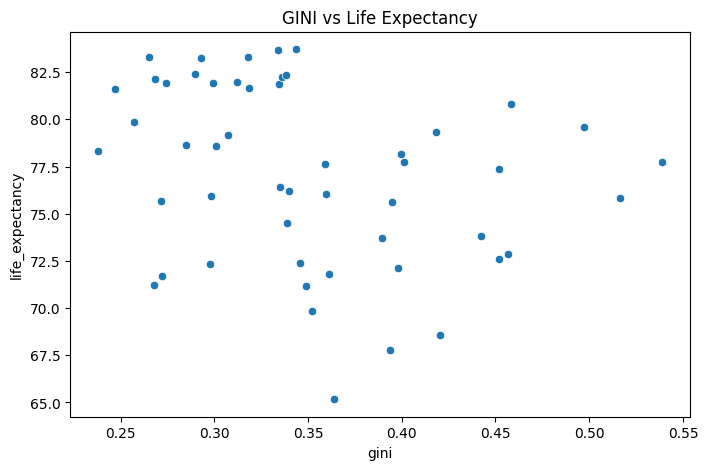

In [ ]:
df_recent = pd.merge(lfex_recent, gini_recent, on='country', how='inner')


df_recent = df_recent.dropna(subset=['life_expectancy', 'gini'])

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_recent,
    x='gini',
    y='life_expectancy',
)
plt.title('GINI vs Life Expectancy')
plt.show()

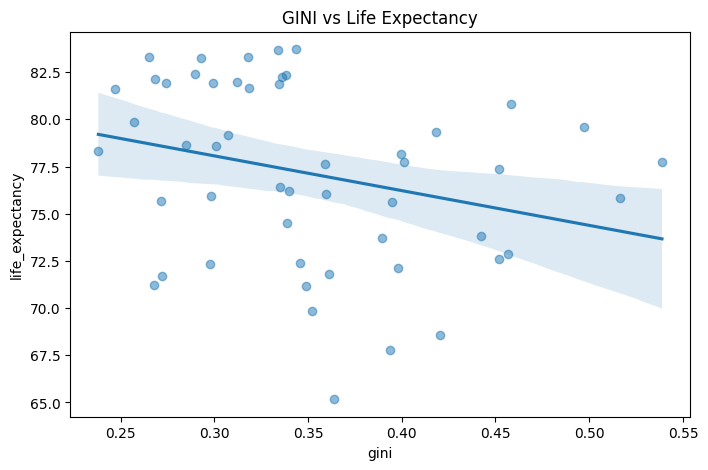

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(data=df_recent, x='gini', y='life_expectancy', scatter_kws={'alpha':0.5})
plt.title('GINI vs Life Expectancy')
plt.show()

In [ ]:
model = smf.ols('life_expectancy ~ gini', data=df_recent).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.186
Date:                Fri, 05 Dec 2025   Prob (F-statistic):             0.0461
Time:                        00:34:12   Log-Likelihood:                -148.98
No. Observations:                  51   AIC:                             302.0
Df Residuals:                      49   BIC:                             305.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.5900      3.224     25.931      0.0

## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

In [ ]:
# Summary Statistics

df[['life_expectancy','gini']].describe()

,life_expectancy,gini
count,2240.000000,2240.000000
mean,72.843682,0.372173
std,7.816870,0.087102
min,36.720000,0.201866
25%,69.238550,0.308114
50%,74.303450,0.352482
75%,78.644550,0.421464
max,84.670300,0.710506


## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)